# Le paquet LEA sur un jeux de données

Le fichier de données peut être téléchargé [ici](https://housecloud.willyrv.com/index.php/s/kN56oKNgkbmPxUf)


In [1]:
# On charge les données de test tu paquet
library(LEA)

# Céation d'un dossier pour les analyses
dir.create("LEA_analyses_sheep")

# On recode le fichier ped
ped2lfmm("./NEU_short.ped", "./LEA_analyses_sheep/NEU_short.lfmm")

setwd("LEA_analyses_sheep")



	- number of detected individuals:	379
	- number of detected loci:		6118



[1] "./LEA_analyses_sheep/NEU_short.lfmm"

In [2]:
# run of pca
# Available options, K (the number of PCs),
# center and scale.
# Create files: genotypes.eigenvalues - eigenvalues,
# genotypes.eigenvectors - eigenvectors,
# genotypes.sdev - standard deviations,
# genotypes.projections - projections,
# Create a pcaProject object: pc.
pc = pca("./NEU_short.lfmm", scale = TRUE)

# Perfom Tracy-Widom tests on all eigenvalues.
# create file: tuto.tracyWidom - tracy-widom test information.
tw = tracy.widom(pc)

# display p-values for the Tracy-Widom tests (first 5 pcs).
tw$pvalues[1:5]



[1] "******************************"
[1] " Principal Component Analysis "
[1] "******************************"
summary of the options:

        -n (number of individuals)          379
        -L (number of loci)                 6118
        -K (number of principal components) 379
        -x (genotype file)                  /home/willy/housecloud/Work/Enseignement/M2 Bioinfo/BioInfoCours/LEA_analyses_sheep/NEU_short.lfmm
        -a (eigenvalue file)                /home/willy/housecloud/Work/Enseignement/M2 Bioinfo/BioInfoCours/LEA_analyses_sheep/NEU_short.pca/NEU_short.eigenvalues
        -e (eigenvector file)               /home/willy/housecloud/Work/Enseignement/M2 Bioinfo/BioInfoCours/LEA_analyses_sheep/NEU_short.pca/NEU_short.eigenvectors
        -d (standard deviation file)        /home/willy/housecloud/Work/Enseignement/M2 Bioinfo/BioInfoCours/LEA_analyses_sheep/NEU_short.pca/NEU_short.sdev
        -p (projection file)                /home/willy/housecloud/Work/Enseignement/M2 Bi

[1] 8e-09 8e-09 8e-09 8e-09 8e-09

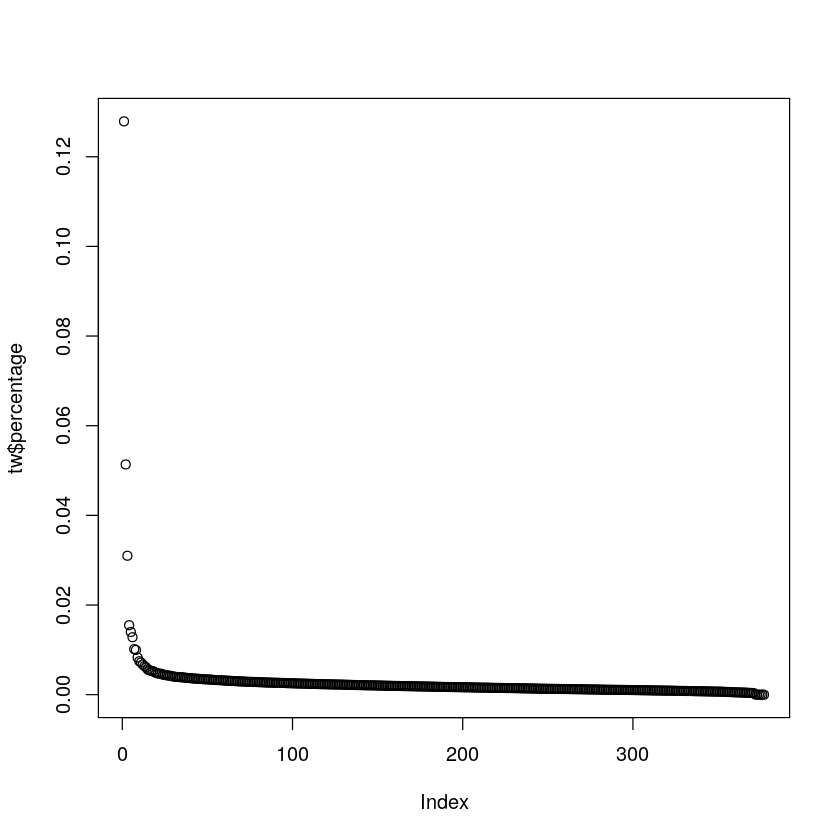

In [3]:
# main options# plot the percentage of variance explained by each component
plot(tw$percentage)

In [4]:
# K = number of ancestral populations
# entropy = TRUE: computes the cross-entropy criterion,
# CPU = 4 the number of CPUs.
project = NULL
project = snmf("./NEU_short.lfmm",
               K = 1:10,
               entropy = TRUE,
               repetitions = 10,
               project = "new")


[1] "*********************************************************"
[1] " Conversion from the lfmm format to the geno format"
[1] "*********************************************************"

	- number of detected individuals:	379
	- number of detected loci:		6118

The project is saved into :
 NEU_short.snmfProject 

To load the project, use:
 project = load.snmfProject("NEU_short.snmfProject")

To remove the project, use:
 remove.snmfProject("NEU_short.snmfProject")

[1] 1115514753
[1] "*************************************"
[1] "*          create.dataset            *"
[1] "*************************************"
summary of the options:

        -n (number of individuals)                 379
        -L (number of loci)                        6118
        -s (seed random init)                      1115514753
        -r (percentage of masked data)             0.05
        -x (genotype file in .geno format)         /home/willy/housecloud/Work/Enseignement/M2 Bioinfo/BioInfoCours/LEA_analyses_s

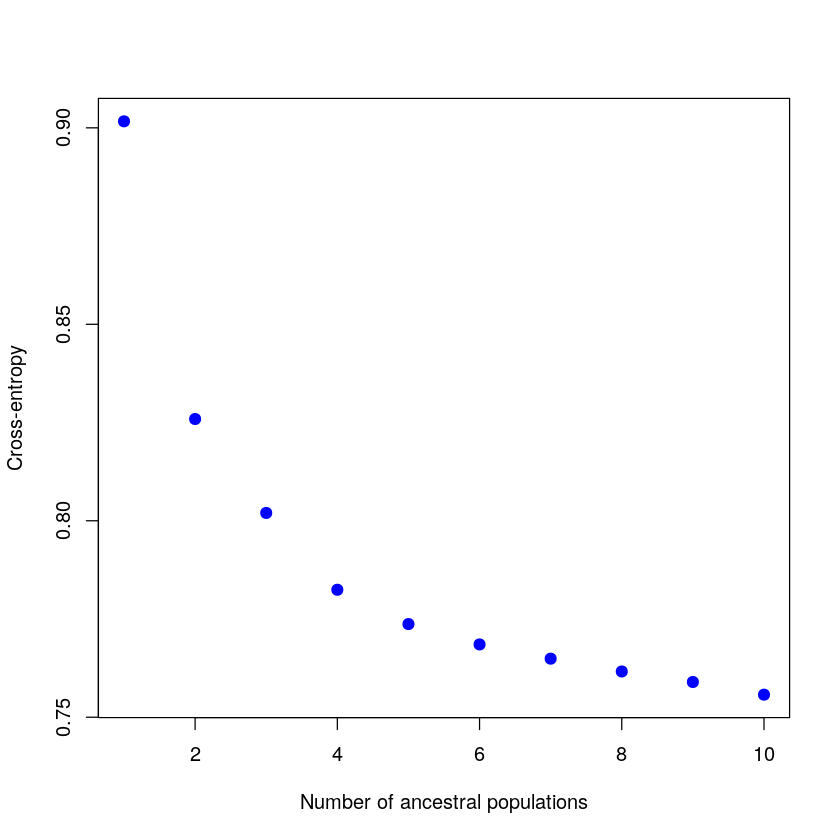

In [5]:
# plot cross-entropy criterion for all runs in the snmf project
plot(project, col = "blue", pch = 19, cex = 1.2)

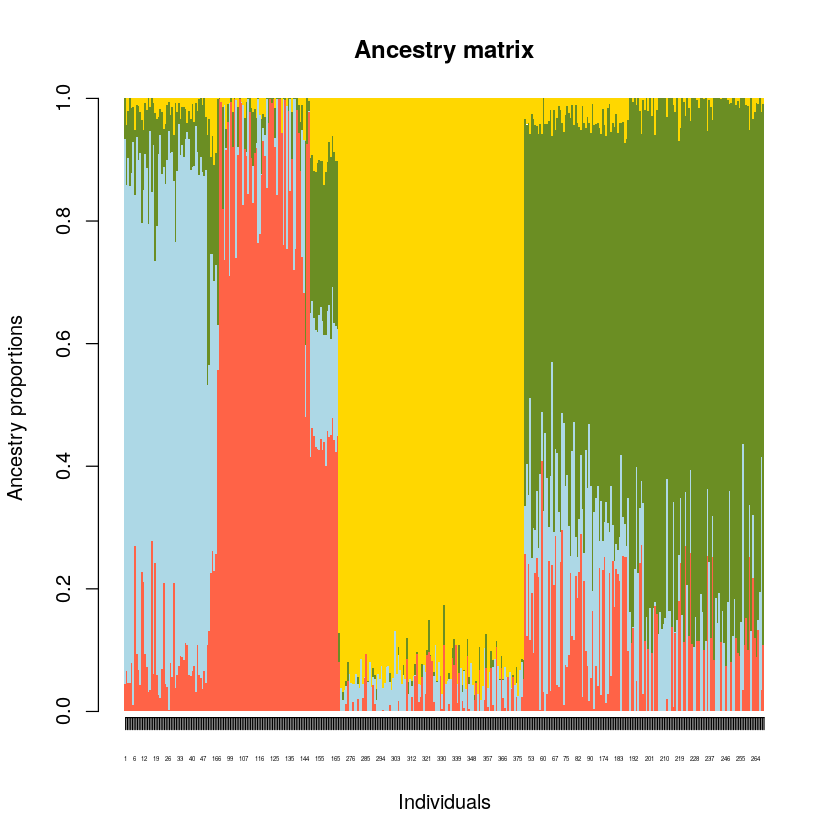

In [7]:
# select the best run for K = 4
best = which.min(cross.entropy(project, K = 4))
my.colors <- c("tomato", "lightblue",
               "olivedrab", "gold")
barchart(project, K = 4, run = best,
         border = NA, space = 0,
         col = my.colors,
         xlab = "Individuals",
         ylab = "Ancestry proportions",
         main = "Ancestry matrix") -> bp
axis(1, at = 1:length(bp$order),
     labels = bp$order, las=1,
     cex.axis = .3)


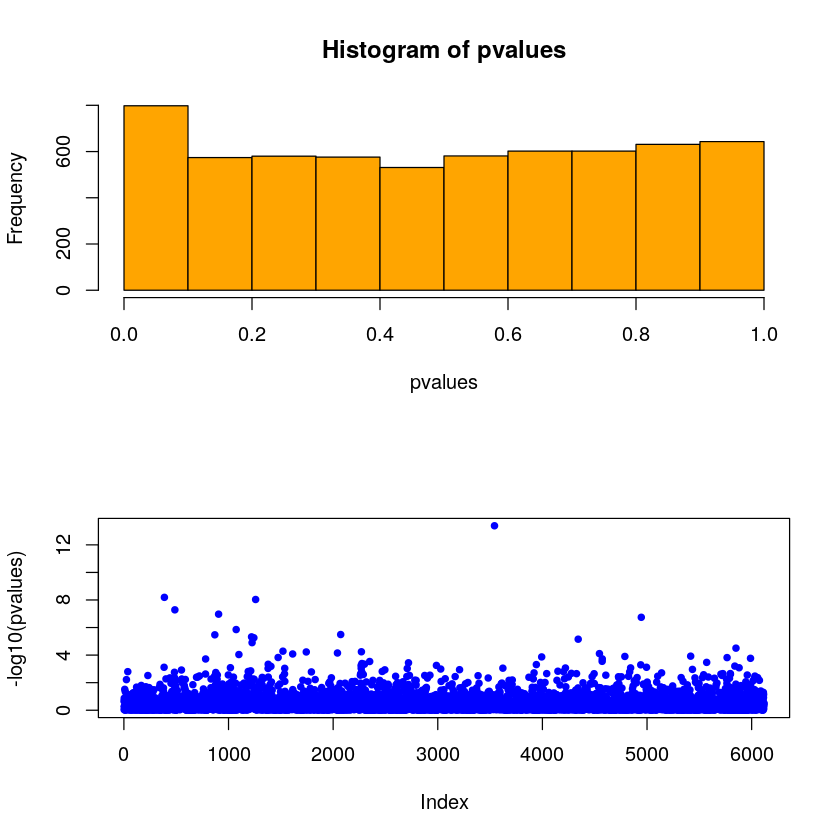

In [8]:
# Population differentiation tests
p = snmf.pvalues(project,
                 entropy = TRUE,
                 ploidy = 2,
                 K = 4)

pvalues = p$pvalues
par(mfrow = c(2,1))
hist(pvalues, col = "orange")
plot(-log10(pvalues), pch = 19, col = "blue", cex = .7)
